**Title**: Image Compression using Autoencoders <br>
**Author**: [Sayan Nath](https://twitter.com/sayannath2350) <br>
**Date created**: 2021/03/25 <br>
**Last modified**: 2021/03/25 <br>
**Description**: How to compress images using autoencoders. <br>

## Introduction

Autoencoders are a deep learning model for transforming data from a high-dimensional space to a lower-dimensional space.  The more accurate the autoencoder, the closer the generated data is to the original. This example will demonstrate how to do image compression using Autoencoders with the help of MNIST dataset.

## Setup

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

np.random.seed(42)
tf.random.set_seed(42)

## Prepare the dataset

In this example, we will be using the MNIST dataset. But this same recipe can be used for other classification datasets as well.

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.reshape(x_train, newshape=(x_train.shape[0], np.prod(x_train.shape[1:])))
x_test = np.reshape(x_test, newshape=(x_test.shape[0], np.prod(x_test.shape[1:])))

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Define hyperparameters

In [47]:
AUTO = tf.data.AUTOTUNE
INPUT_SHAPE=784
BATCH_SIZE = 256
EPOCHS = 50

## Build the Encoder

In [23]:
def get_encoder_model():
    x = layers.Input(shape=(INPUT_SHAPE), name="encoder_input")

    encoder_dense_layer1 = layers.Dense(units=300, name="encoder_dense_1")(x)
    encoder_activ_layer1 = layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

    encoder_dense_layer2 = layers.Dense(units=2, name="encoder_dense_2")(encoder_activ_layer1)
    encoder_output = layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)

    encoder = Model(x, encoder_output, name="encoder_model")   
    return encoder 

In [25]:
encoder = get_encoder_model()
encoder.summary()

Model: "encoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
encoder_dense_1 (Dense)      (None, 300)               235500    
_________________________________________________________________
encoder_leakyrelu_1 (LeakyRe (None, 300)               0         
_________________________________________________________________
encoder_dense_2 (Dense)      (None, 2)                 602       
_________________________________________________________________
encoder_output (LeakyReLU)   (None, 2)                 0         
Total params: 236,102
Trainable params: 236,102
Non-trainable params: 0
_________________________________________________________________


## Build the Decoder

In [24]:
def get_decoder_model():
    decoder_input = layers.Input(shape=(2), name="decoder_input")

    decoder_dense_layer1 = layers.Dense(units=300, name="decoder_dense_1")(decoder_input)
    decoder_activ_layer1 = layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

    decoder_dense_layer2 = layers.Dense(units=INPUT_SHAPE, name="decoder_dense_2")(decoder_activ_layer1)
    decoder_output = layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

    decoder = Model(decoder_input, decoder_output, name="decoder_model")
    return decoder

In [26]:
decoder = get_decoder_model()
decoder.summary()

Model: "decoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
decoder_dense_1 (Dense)      (None, 300)               900       
_________________________________________________________________
decoder_leakyrelu_1 (LeakyRe (None, 300)               0         
_________________________________________________________________
decoder_dense_2 (Dense)      (None, 784)               235984    
_________________________________________________________________
decoder_output (LeakyReLU)   (None, 784)               0         
Total params: 236,884
Trainable params: 236,884
Non-trainable params: 0
_________________________________________________________________


## Build the Autoencoder

In [27]:
def get_autoencoder_model():
    ae_input = layers.Input(shape=(INPUT_SHAPE), name="AE_input")
    ae_encoder_output = encoder(ae_input)
    ae_decoder_output = decoder(ae_encoder_output)   

    ae_model = Model(ae_input, ae_decoder_output, name="AE")
    return ae_model 

## Summary of the Model

In [28]:
autoencoder_model = get_autoencoder_model()
autoencoder_model.summary()

Model: "AE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
AE_input (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
encoder_model (Functional)   (None, 2)                 236102    
_________________________________________________________________
decoder_model (Functional)   (None, 784)               236884    
Total params: 472,986
Trainable params: 472,986
Non-trainable params: 0
_________________________________________________________________


## Compile Model

In [29]:
autoencoder_model.compile(loss="mse", optimizer=Adam(learning_rate=0.0005))

## Train Model

In [48]:
autoencoder_model.fit(x_train, x_train, epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 19ms/step - loss: 0.0414 - val_loss: 0.0419
Epoch 2/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0414 - val_loss: 0.0420
Epoch 3/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0414 - val_loss: 0.0419
Epoch 4/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0413 - val_loss: 0.0420
Epoch 5/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0413 - val_loss: 0.0419
Epoch 6/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0413 - val_loss: 0.0419
Epoch 7/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0412 - val_loss: 0.0417
Epoch 8/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0412 - val_loss: 0.0418
Epoch 9/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0412 - val_loss: 0.0418
Epoch 10/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0412 - val_lo

## Making Predictions

In [50]:
encoded_images = encoder.predict(x_train)
decoded_images = decoder.predict(encoded_images)

In [51]:
decoded_images_orig = np.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))

## View generated samples

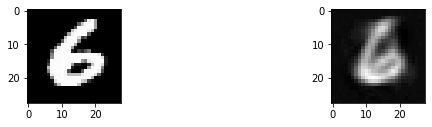

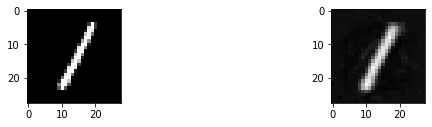

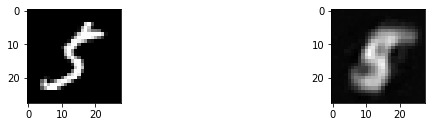

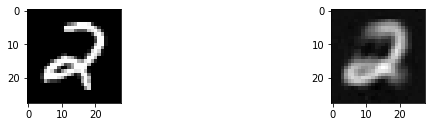

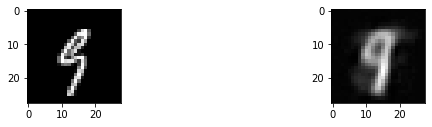

In [52]:
num_images_to_show = 5

for im_ind in range(num_images_to_show):
    plt.figure(figsize=(10, 10))
    plot_ind = im_ind*2 + 1
    rand_ind = np.random.randint(low=0, high=x_train.shape[0])
    plt.subplot(num_images_to_show, 2, plot_ind)
    plt.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    plt.subplot(num_images_to_show, 2, plot_ind+1)
    plt.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")